In [1]:
import numpy as np
import pandas as pd
import pydicom
%matplotlib inline
import matplotlib.pyplot as plt
import keras 
from skimage.transform import resize

Using TensorFlow backend.


In [2]:
# This function reads in a .dcm file, checks the important fields for our device, and returns a numpy array
# of just the imaging data
def check_dicom(filename): 
    # todo
    
#     print('Load file {} ...'.format(filename))
    ds = pydicom.dcmread(filename)       
    if ds.BodyPartExamined != 'CHEST':
        raise TypeError("{}: Not a chest X-Ray, skipping...".format(filename))
    if ds.Modality != 'DX':
        raise TypeError("{}: Not DX Modality, skipping...".format(filename))
    if ds.PatientPosition not in ["PA", "AP"]:
        raise TypeError("{}: Invalid position, skipping...".format(filename))
    img = ds.pixel_array
    return img / 255.0
    
    
# This function takes the numpy array output by check_dicom and 
# runs the appropriate pre-processing needed for our model input
def preprocess_image(img,img_mean,img_std,img_size): 
    # todo
    proc_img = resize((img - img_mean) / img_std, img_size)
    return proc_img

# This function loads in our trained model w/ weights and compiles it 
def load_model(model_path, weight_path):
    # todo
    model = keras.models.model_from_json(open(model_path, 'r').read())
    model.load_weights(weight_path)
    return model

# This function uses our device's threshold parameters to predict whether or not
# the image shows the presence of pneumonia using our trained model
def predict_image(model, img, thresh): 
    # todo    
    pred = model.predict(img)[0][0]
    prediction = "{} (Probability = {})".format(str(pred >= thresh), pred)
    return prediction 

test4.dcm: Not a chest X-Ray, skipping...
test5.dcm: Not DX Modality, skipping...
test6.dcm: Invalid position, skipping...


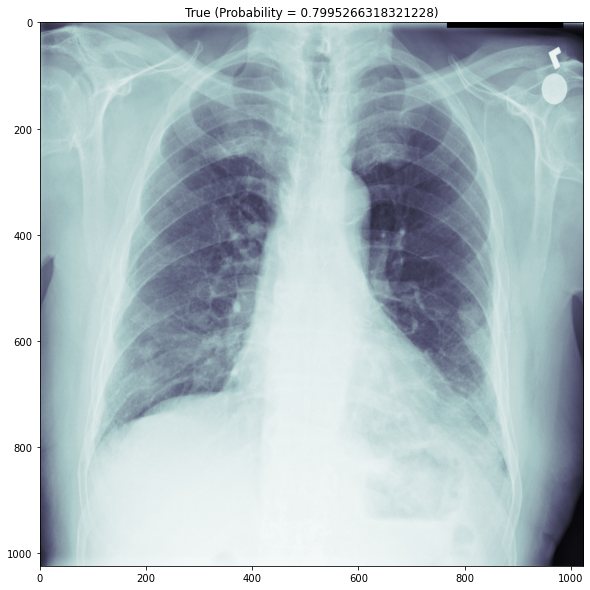

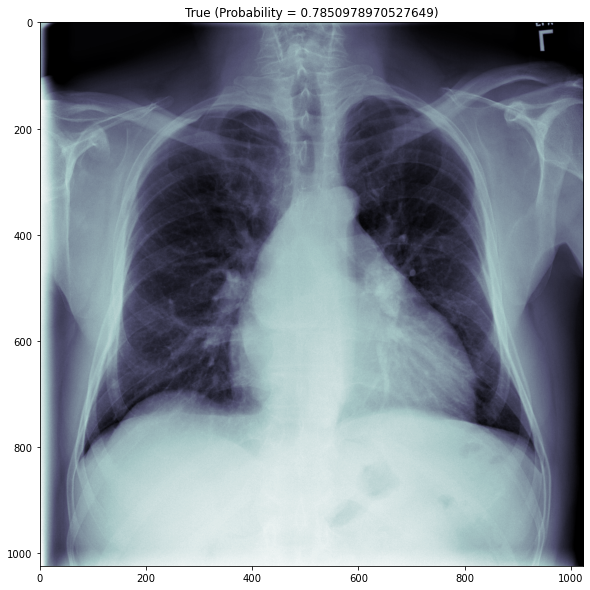

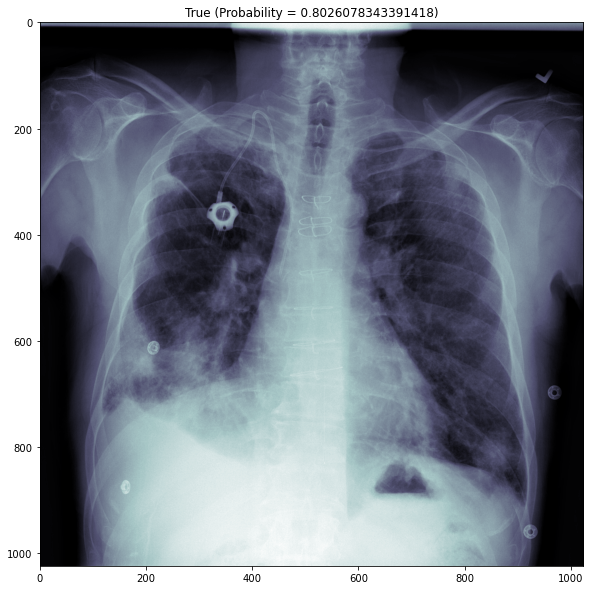

In [3]:
test_dicoms = ['test1.dcm','test2.dcm','test3.dcm','test4.dcm','test5.dcm','test6.dcm']

model_path = 'my_model.json'
weight_path = 'xray_class_my_model.best.hdf5'

IMG_SIZE=(1,224,224,3) # This might be different if you did not use vgg16
img_mean = None# loads the mean image value they used during training preprocessing
img_std = None# loads the std dev image value they used during training preprocessing

my_model = load_model(model_path, weight_path)
thresh = 0.36


# use the .dcm files to test your prediction
for i in test_dicoms:
    try:
        img = np.array([])
        img = check_dicom(i)

        if img is None:
            continue

        img_mean = np.mean(img)
        img_std = np.std(img)
        img_proc = preprocess_image(img,img_mean,img_std,IMG_SIZE)
        pred = predict_image(my_model,img_proc,thresh)
        plt.figure(figsize=(10, 10))
        plt.title(pred)
        plt.imshow(img, cmap='bone')
    except TypeError as err:
        print(err)